### Importing Libraries and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
dataset = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")
dataset.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


### Data Understanding and EDA

In [3]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [5]:
dataset.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [6]:
df= dataset.copy()

In [7]:
df['Diabetes_01'] = df['Diabetes_012'].replace({1: 0, 2: 1})

In [8]:
print(df['Diabetes_01'].unique())

[0. 1.]


In [9]:
df.drop(columns=['Diabetes_012'], inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,236378.0,0.418558,0.493324,0.0,0.0,0.0,1.0,1.0
HighChol,236378.0,0.402059,0.490315,0.0,0.0,0.0,1.0,1.0
CholCheck,236378.0,0.963347,0.187909,0.0,1.0,1.0,1.0,1.0
BMI,236378.0,28.953579,6.552055,12.0,24.0,28.0,32.0,99.0
Smoker,236378.0,0.411997,0.492196,0.0,0.0,0.0,1.0,1.0
Stroke,236378.0,0.038900,0.193356,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,236378.0,0.086548,0.281172,0.0,0.0,0.0,0.0,1.0
PhysActivity,236378.0,0.779231,0.414766,0.0,1.0,1.0,1.0,1.0
Fruits,236378.0,0.621259,0.485074,0.0,0.0,1.0,1.0,1.0
Veggies,236378.0,0.827767,0.377583,0.0,1.0,1.0,1.0,1.0


In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car= grab_col_names(df)

Observations: 236378
Variables: 22
cat_cols: 17
num_cols: 5
cat_but_car: 0
num_but_cat: 17


In [13]:
cat_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Education',
 'Diabetes_01']

In [14]:
num_cols

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']

In [15]:
%matplotlib inline
def num_summary(dataframe, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 1]
    for col in num_cols:  # num_cols = grab_col_names(dataframe)["num_cols"]
        print("########## Summary Statistics of " + col + " ############")
        print(dataframe[col].describe(quantiles))
        
        if plot:
            plt.hist(data=dataframe, x=col)
            plt.xlabel(col)
            plt.title("The distribution of " + col)
            plt.grid(True)  
            plt.show(block=True)
            plt.title("The boxplot of " + col)
            plt.boxplot(x=df[col])
            plt.show(block=True)

########## Summary Statistics of BMI ############
count    236378.000000
mean         28.953579
std           6.552055
min          12.000000
5%           21.000000
10%          22.000000
20%          24.000000
30%          25.000000
40%          27.000000
50%          28.000000
60%          29.000000
70%          31.000000
80%          33.000000
90%          37.000000
95%          41.000000
100%         99.000000
max          99.000000
Name: BMI, dtype: float64


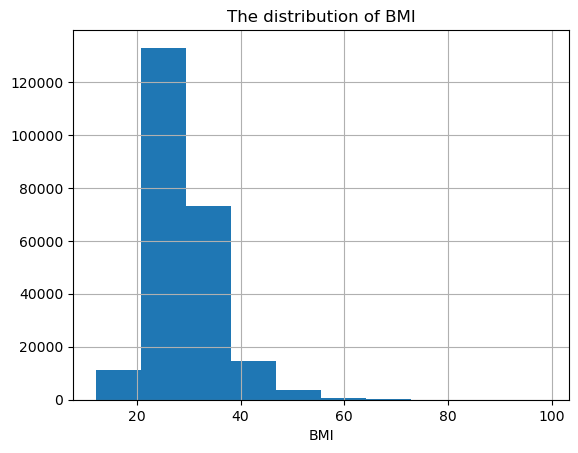

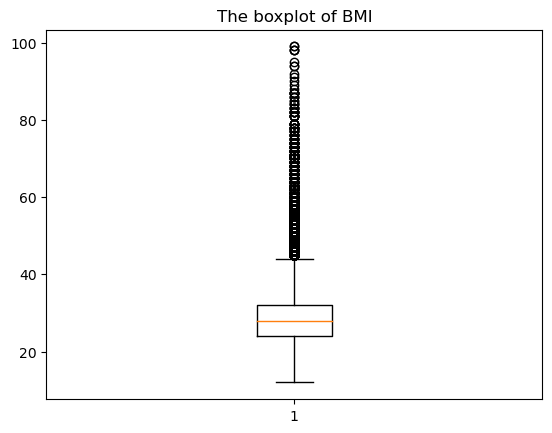

########## Summary Statistics of MentHlth ############
count    236378.000000
mean          3.937710
std           7.886506
min           0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           2.000000
80%           5.000000
90%          15.000000
95%          30.000000
100%         30.000000
max          30.000000
Name: MentHlth, dtype: float64


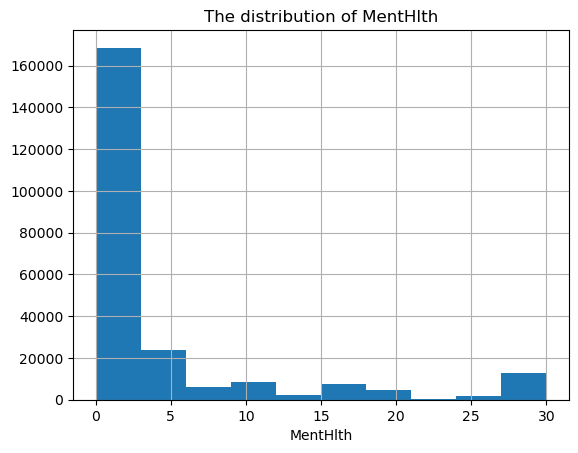

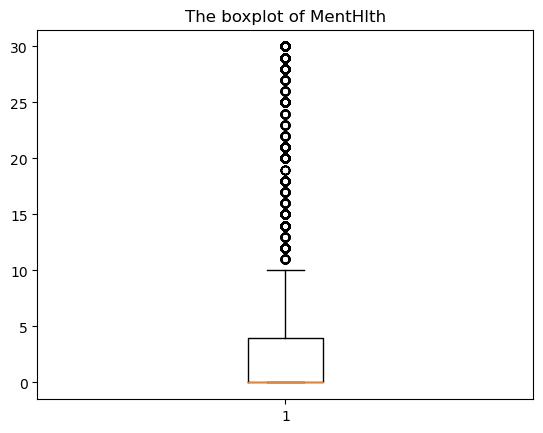

########## Summary Statistics of PhysHlth ############
count    236378.000000
mean          3.751297
std           8.245907
min           0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           1.000000
80%           4.000000
90%          15.000000
95%          30.000000
100%         30.000000
max          30.000000
Name: PhysHlth, dtype: float64


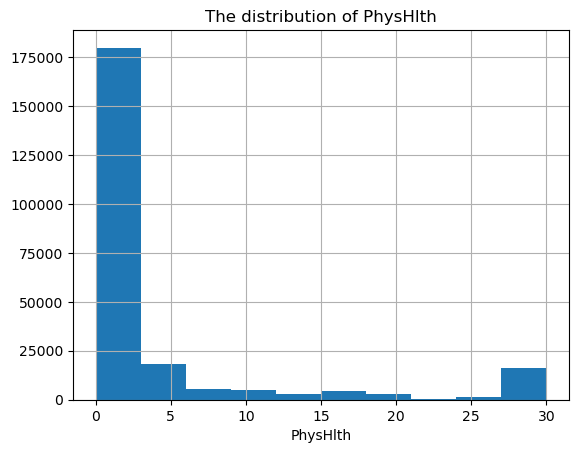

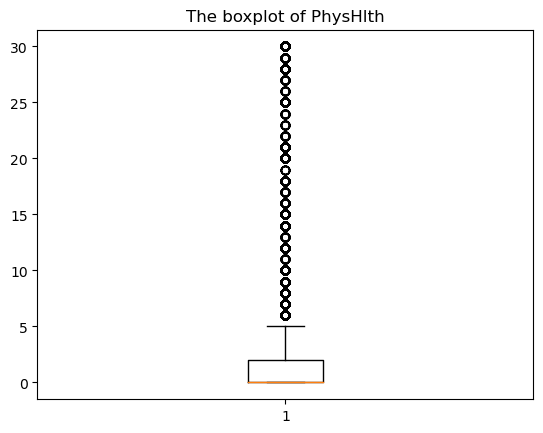

########## Summary Statistics of Age ############
count    236378.000000
mean          7.863930
std           3.236997
min           1.000000
5%            2.000000
10%           3.000000
20%           5.000000
30%           6.000000
40%           7.000000
50%           8.000000
60%           9.000000
70%          10.000000
80%          11.000000
90%          12.000000
95%          13.000000
100%         13.000000
max          13.000000
Name: Age, dtype: float64


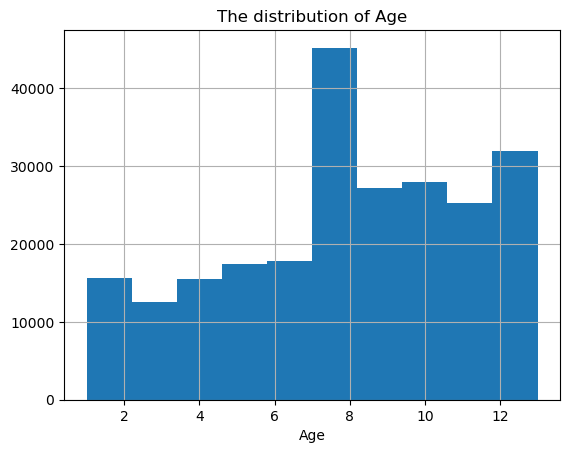

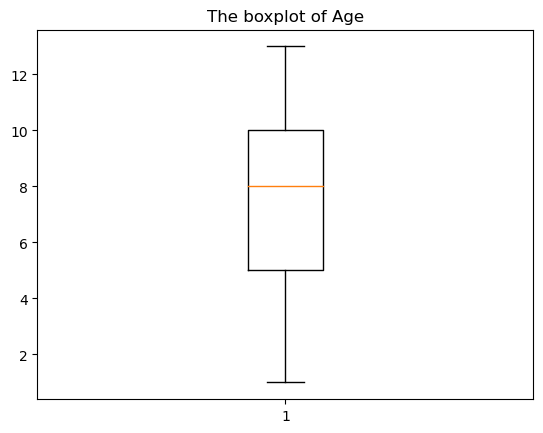

########## Summary Statistics of Income ############
count    236378.000000
mean          6.927451
std           2.375450
min           1.000000
5%            2.000000
10%           4.000000
20%           5.000000
30%           6.000000
40%           7.000000
50%           7.000000
60%           8.000000
70%           8.000000
80%           9.000000
90%          10.000000
95%          11.000000
100%         11.000000
max          11.000000
Name: Income, dtype: float64


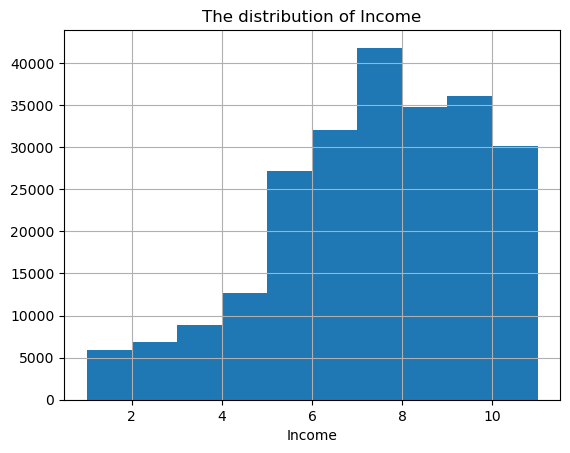

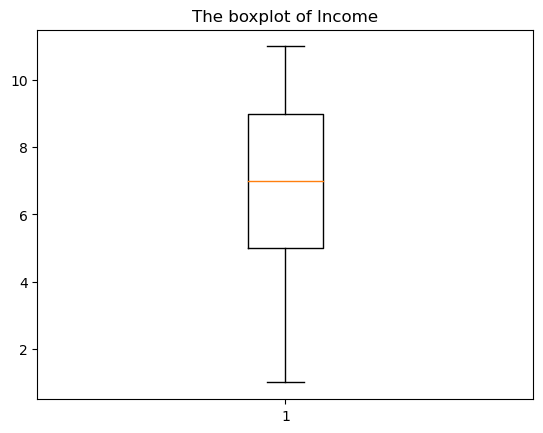

In [16]:
num_summary(df, plot=True)

In [17]:
def cat_summary(dataframe, plot=False):
    import matplotlib.pyplot as plt
    for col in cat_cols:
        print("############## Frequency of Categorical Data ########################")
        print("The unique number of " + col + ": " + str(dataframe[col].nunique()))
        print(pd.DataFrame({col: dataframe[col].value_counts(),
                            "Ratio": 100* dataframe[col].value_counts() / len(dataframe)}))
        if plot:
            if dataframe[col].dtypes == "bool":
                dataframe[col] == dataframe[col].astype(int)
                plt.hist(dataframe[col])
                plt.xlabel(col)
                plt.ylabel("Frequency")
                plt.title("Frequency of " + col)
                plt.show()
            else:
                values, counts = zip(*sorted(dataframe[col].value_counts().items()))
                plt.bar(values, counts)
                plt.xlabel(col)
                plt.ylabel("Frequency")
                plt.title("Frequency of " + col)
                plt.show()


############## Frequency of Categorical Data ########################
The unique number of HighBP: 2
   HighBP      Ratio
0  137440  58.144159
1   98938  41.855841


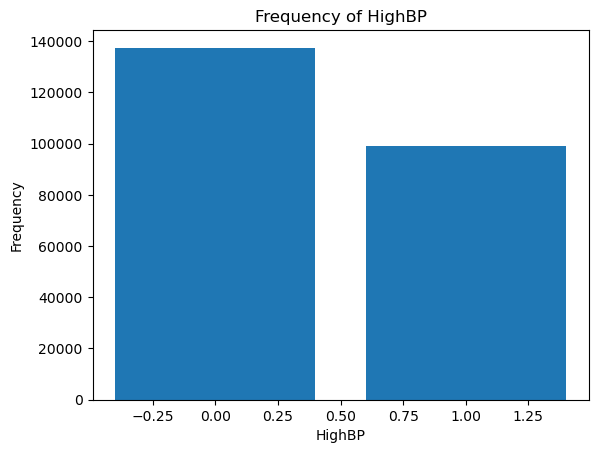

############## Frequency of Categorical Data ########################
The unique number of HighChol: 2
     HighChol      Ratio
0.0    141340  59.794059
1.0     95038  40.205941


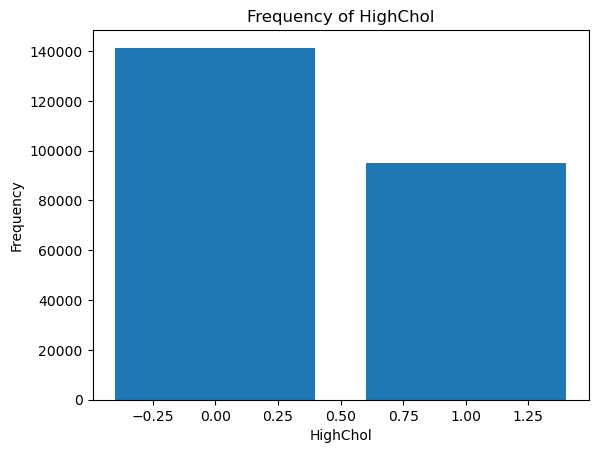

############## Frequency of Categorical Data ########################
The unique number of CholCheck: 2
   CholCheck      Ratio
1     227714  96.334684
0       8664   3.665316


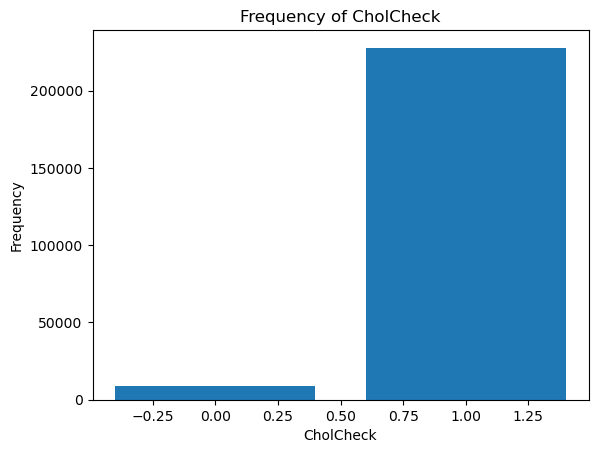

############## Frequency of Categorical Data ########################
The unique number of Smoker: 2
     Smoker      Ratio
0.0  138991  58.800311
1.0   97387  41.199689


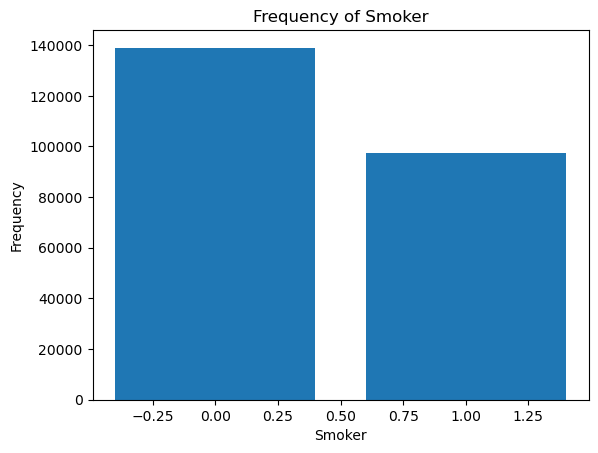

############## Frequency of Categorical Data ########################
The unique number of Stroke: 2
     Stroke      Ratio
0.0  227183  96.110044
1.0    9195   3.889956


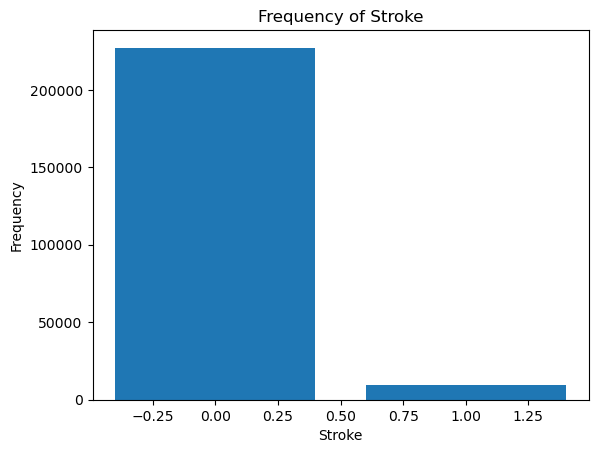

############## Frequency of Categorical Data ########################
The unique number of HeartDiseaseorAttack: 2
     HeartDiseaseorAttack      Ratio
0.0                215920  91.345218
1.0                 20458   8.654782


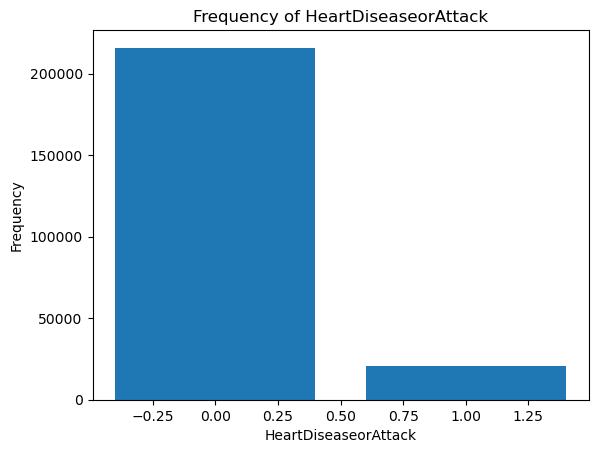

############## Frequency of Categorical Data ########################
The unique number of PhysActivity: 2
   PhysActivity      Ratio
1        184193  77.923072
0         52185  22.076928


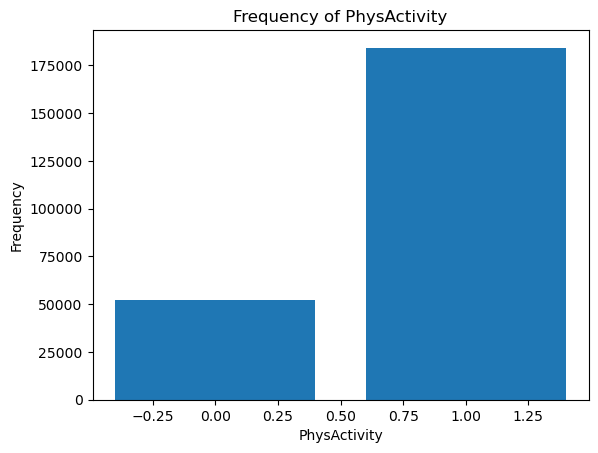

############## Frequency of Categorical Data ########################
The unique number of Fruits: 2
   Fruits      Ratio
1  146852  62.125917
0   89526  37.874083


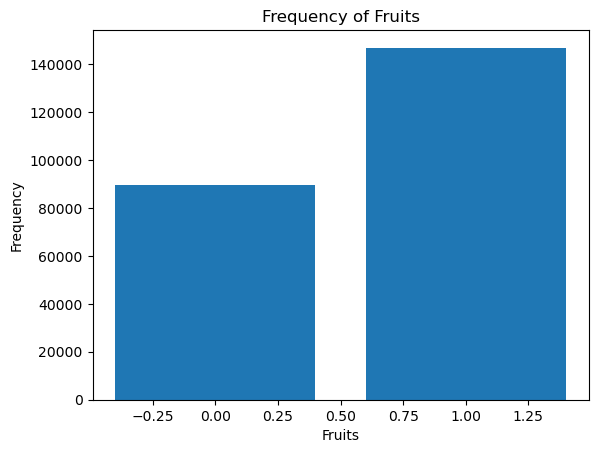

############## Frequency of Categorical Data ########################
The unique number of Veggies: 2
   Veggies      Ratio
1   195666  82.776739
0    40712  17.223261


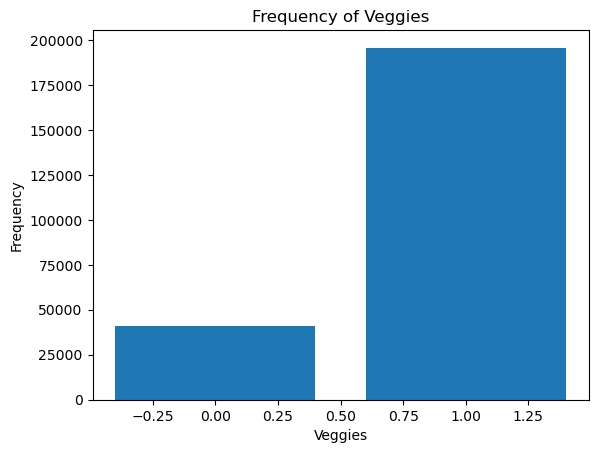

############## Frequency of Categorical Data ########################
The unique number of HvyAlcoholConsump: 2
   HvyAlcoholConsump      Ratio
0             221703  93.791723
1              14675   6.208277


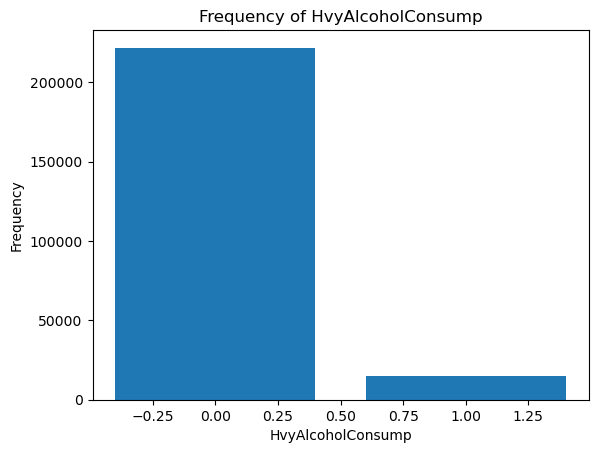

############## Frequency of Categorical Data ########################
The unique number of AnyHealthcare: 2
   AnyHealthcare      Ratio
1         227531  96.257266
0           8847   3.742734


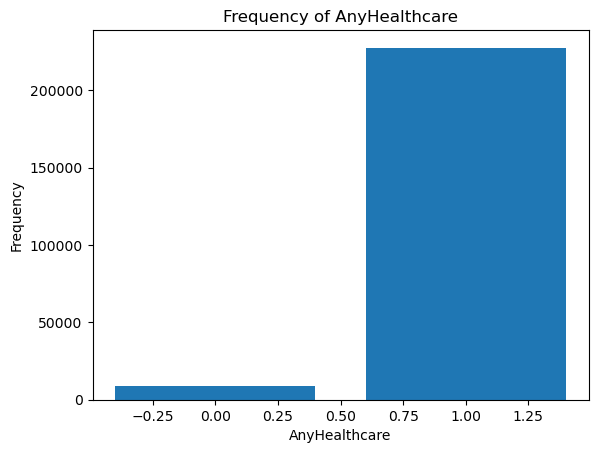

############## Frequency of Categorical Data ########################
The unique number of NoDocbcCost: 2
     NoDocbcCost     Ratio
0.0       221312  93.62631
1.0        15066   6.37369


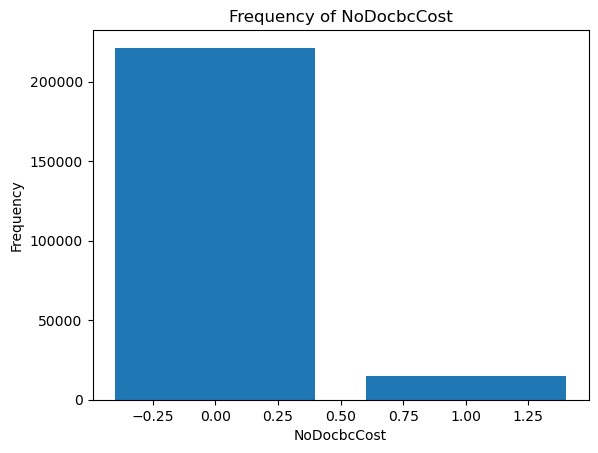

############## Frequency of Categorical Data ########################
The unique number of GenHlth: 5
     GenHlth      Ratio
2.0    85202  36.044810
3.0    73088  30.919967
1.0    41475  17.546049
4.0    27821  11.769708
5.0     8792   3.719466


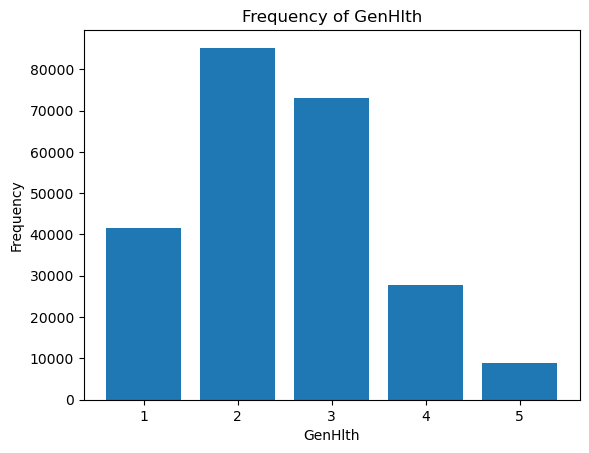

############## Frequency of Categorical Data ########################
The unique number of DiffWalk: 2
     DiffWalk      Ratio
0.0    199988  84.605166
1.0     36390  15.394834


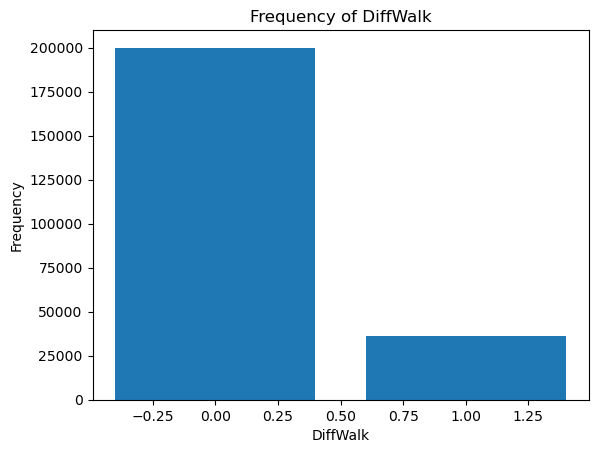

############## Frequency of Categorical Data ########################
The unique number of Sex: 2
      Sex      Ratio
0  123431  52.217634
1  112947  47.782366


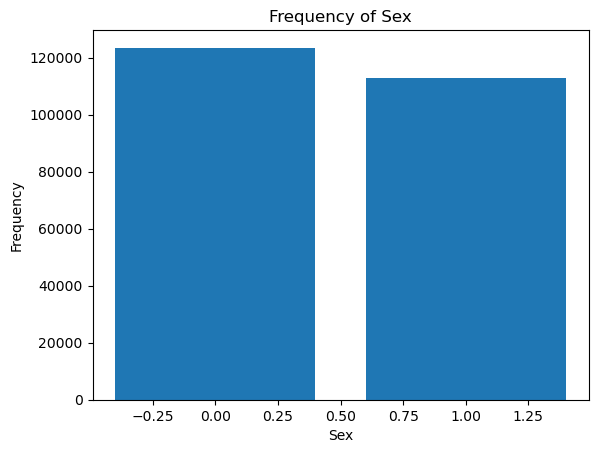

############## Frequency of Categorical Data ########################
The unique number of Education: 6
     Education      Ratio
6.0     108402  45.859598
5.0      65377  27.657819
4.0      52741  22.312144
3.0       6940   2.935975
2.0       2771   1.172275
1.0        147   0.062189


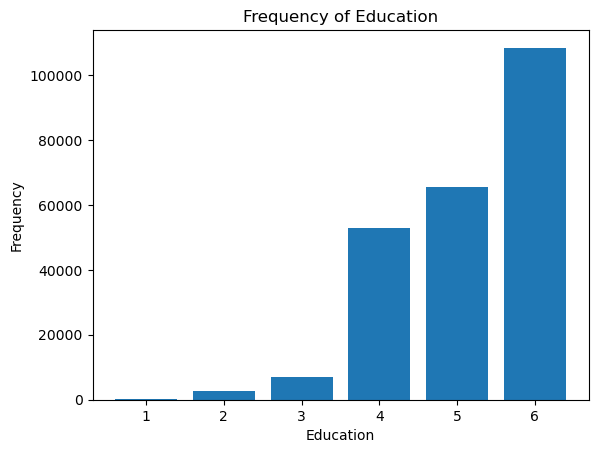

############## Frequency of Categorical Data ########################
The unique number of Diabetes_01: 2
     Diabetes_01      Ratio
0.0       202810  85.799017
1.0        33568  14.200983


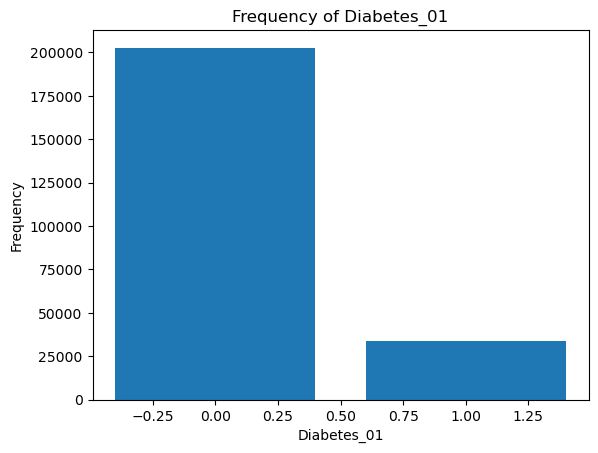

In [18]:
cat_summary(df,plot=True)

<Figure size 4000x2000 with 0 Axes>

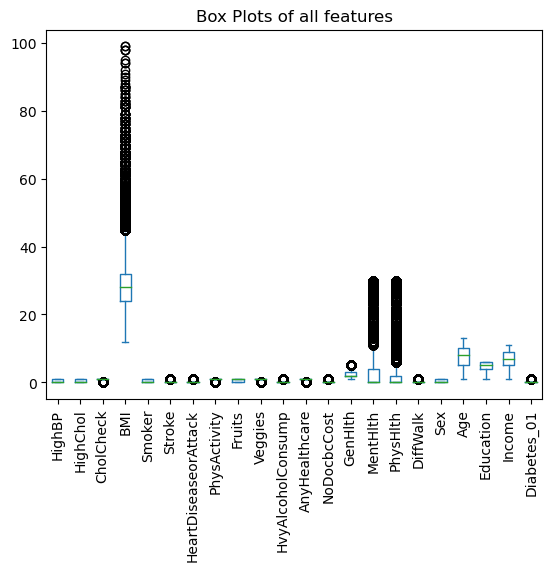

In [19]:
# Check if there are outliers
plt.figure(figsize=(40,20))
df.plot(kind='box')
plt.title("Box Plots of all features")
plt.xticks(rotation=90)
plt.show()

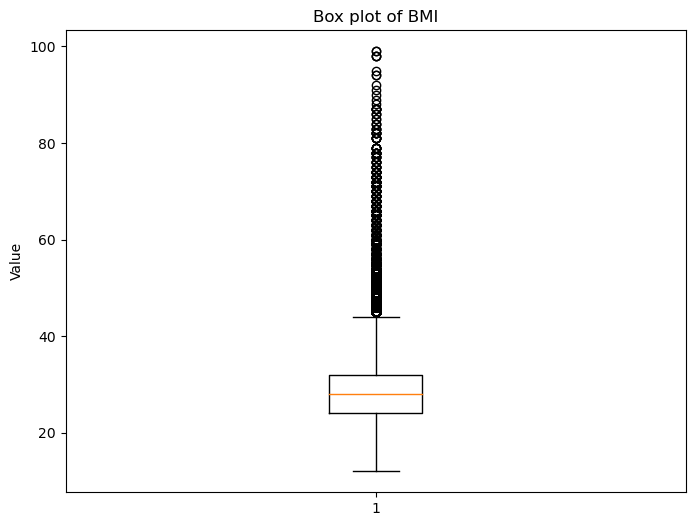

In [20]:
column_name = 'BMI' 

plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box plot of {}'.format(column_name))
plt.ylabel('Value')
plt.show()

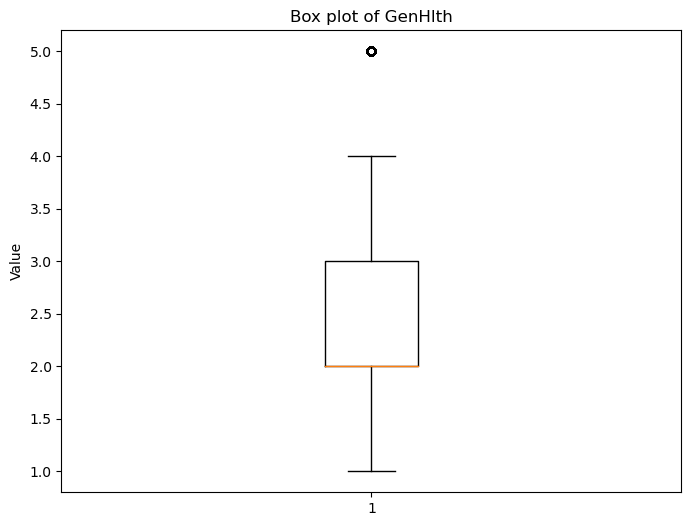

In [21]:
column_name = 'GenHlth'

plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box plot of {}'.format(column_name))
plt.ylabel('Value')
plt.show()

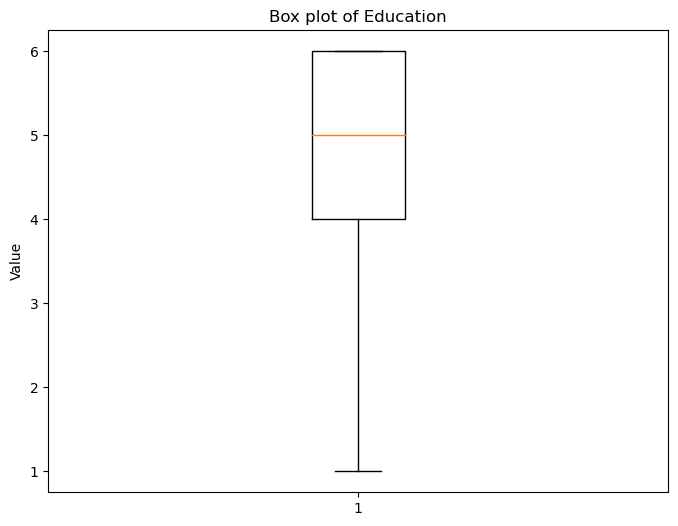

In [22]:
column_name = 'Education'

plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box plot of {}'.format(column_name))
plt.ylabel('Value')
plt.show()

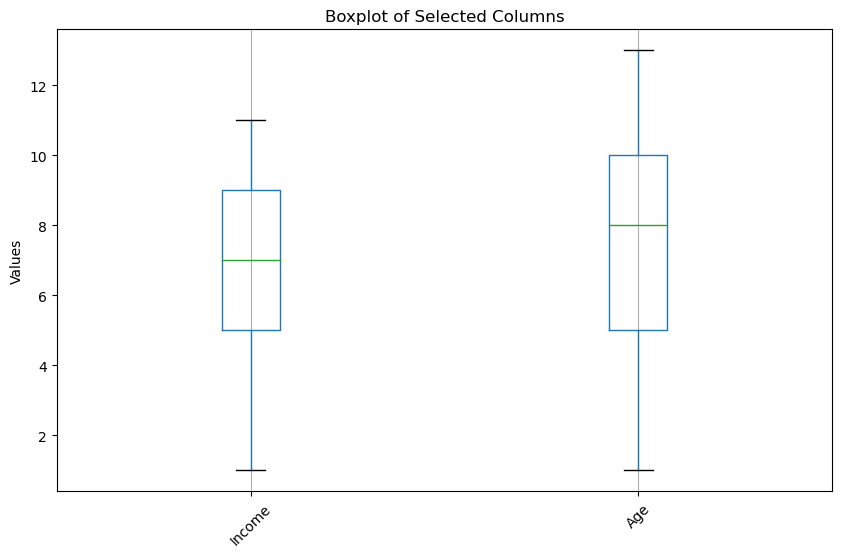

In [23]:
selected_columns = [ 'Income', 'Age']

plt.figure(figsize=(10, 6))
df[selected_columns].boxplot()
plt.title('Boxplot of Selected Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

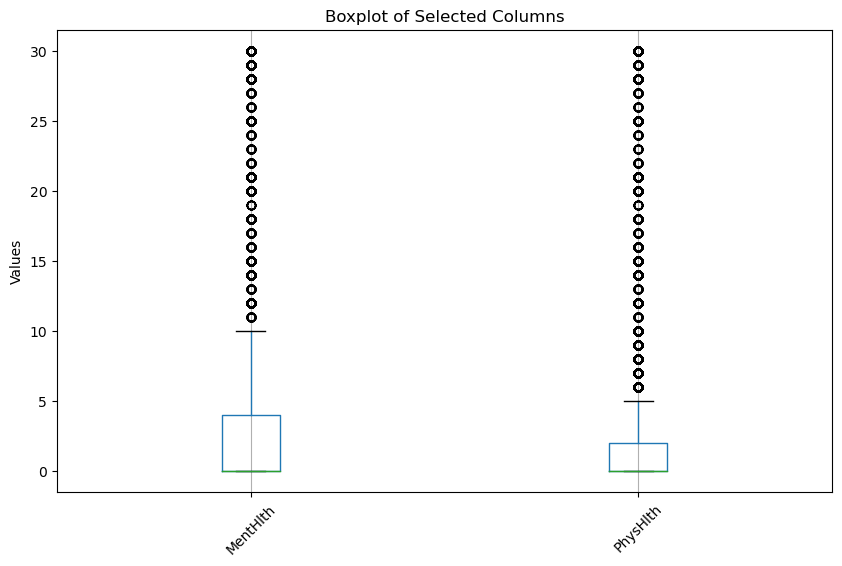

In [24]:
selected_columns = ['MentHlth','PhysHlth']

plt.figure(figsize=(10, 6))
df[selected_columns].boxplot()
plt.title('Boxplot of Selected Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [25]:
# Removing Outlers
# Define the columns where outliers are more
outlier_columns = [ 'BMI', 'MentHlth', 'PhysHlth'] 

Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df_no_outliers = df[~((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).any(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)


Original dataset shape: (236378, 22)
Dataset shape after removing outliers: (177482, 22)


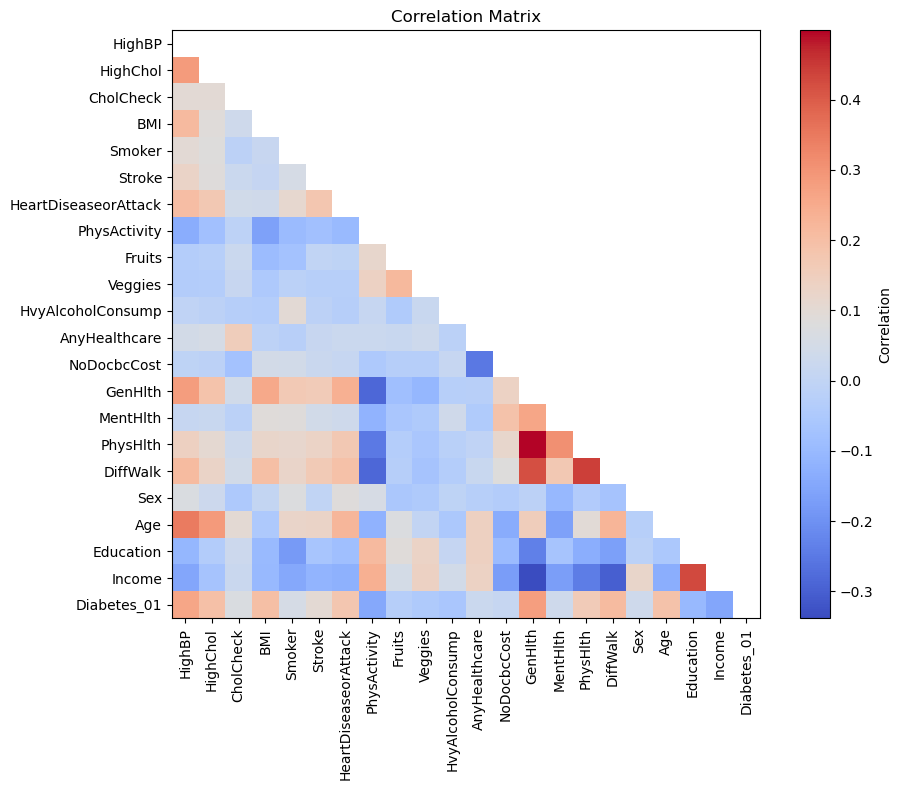

In [26]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the upper triangle values to NaN
corr_matrix = corr_matrix.mask(mask)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

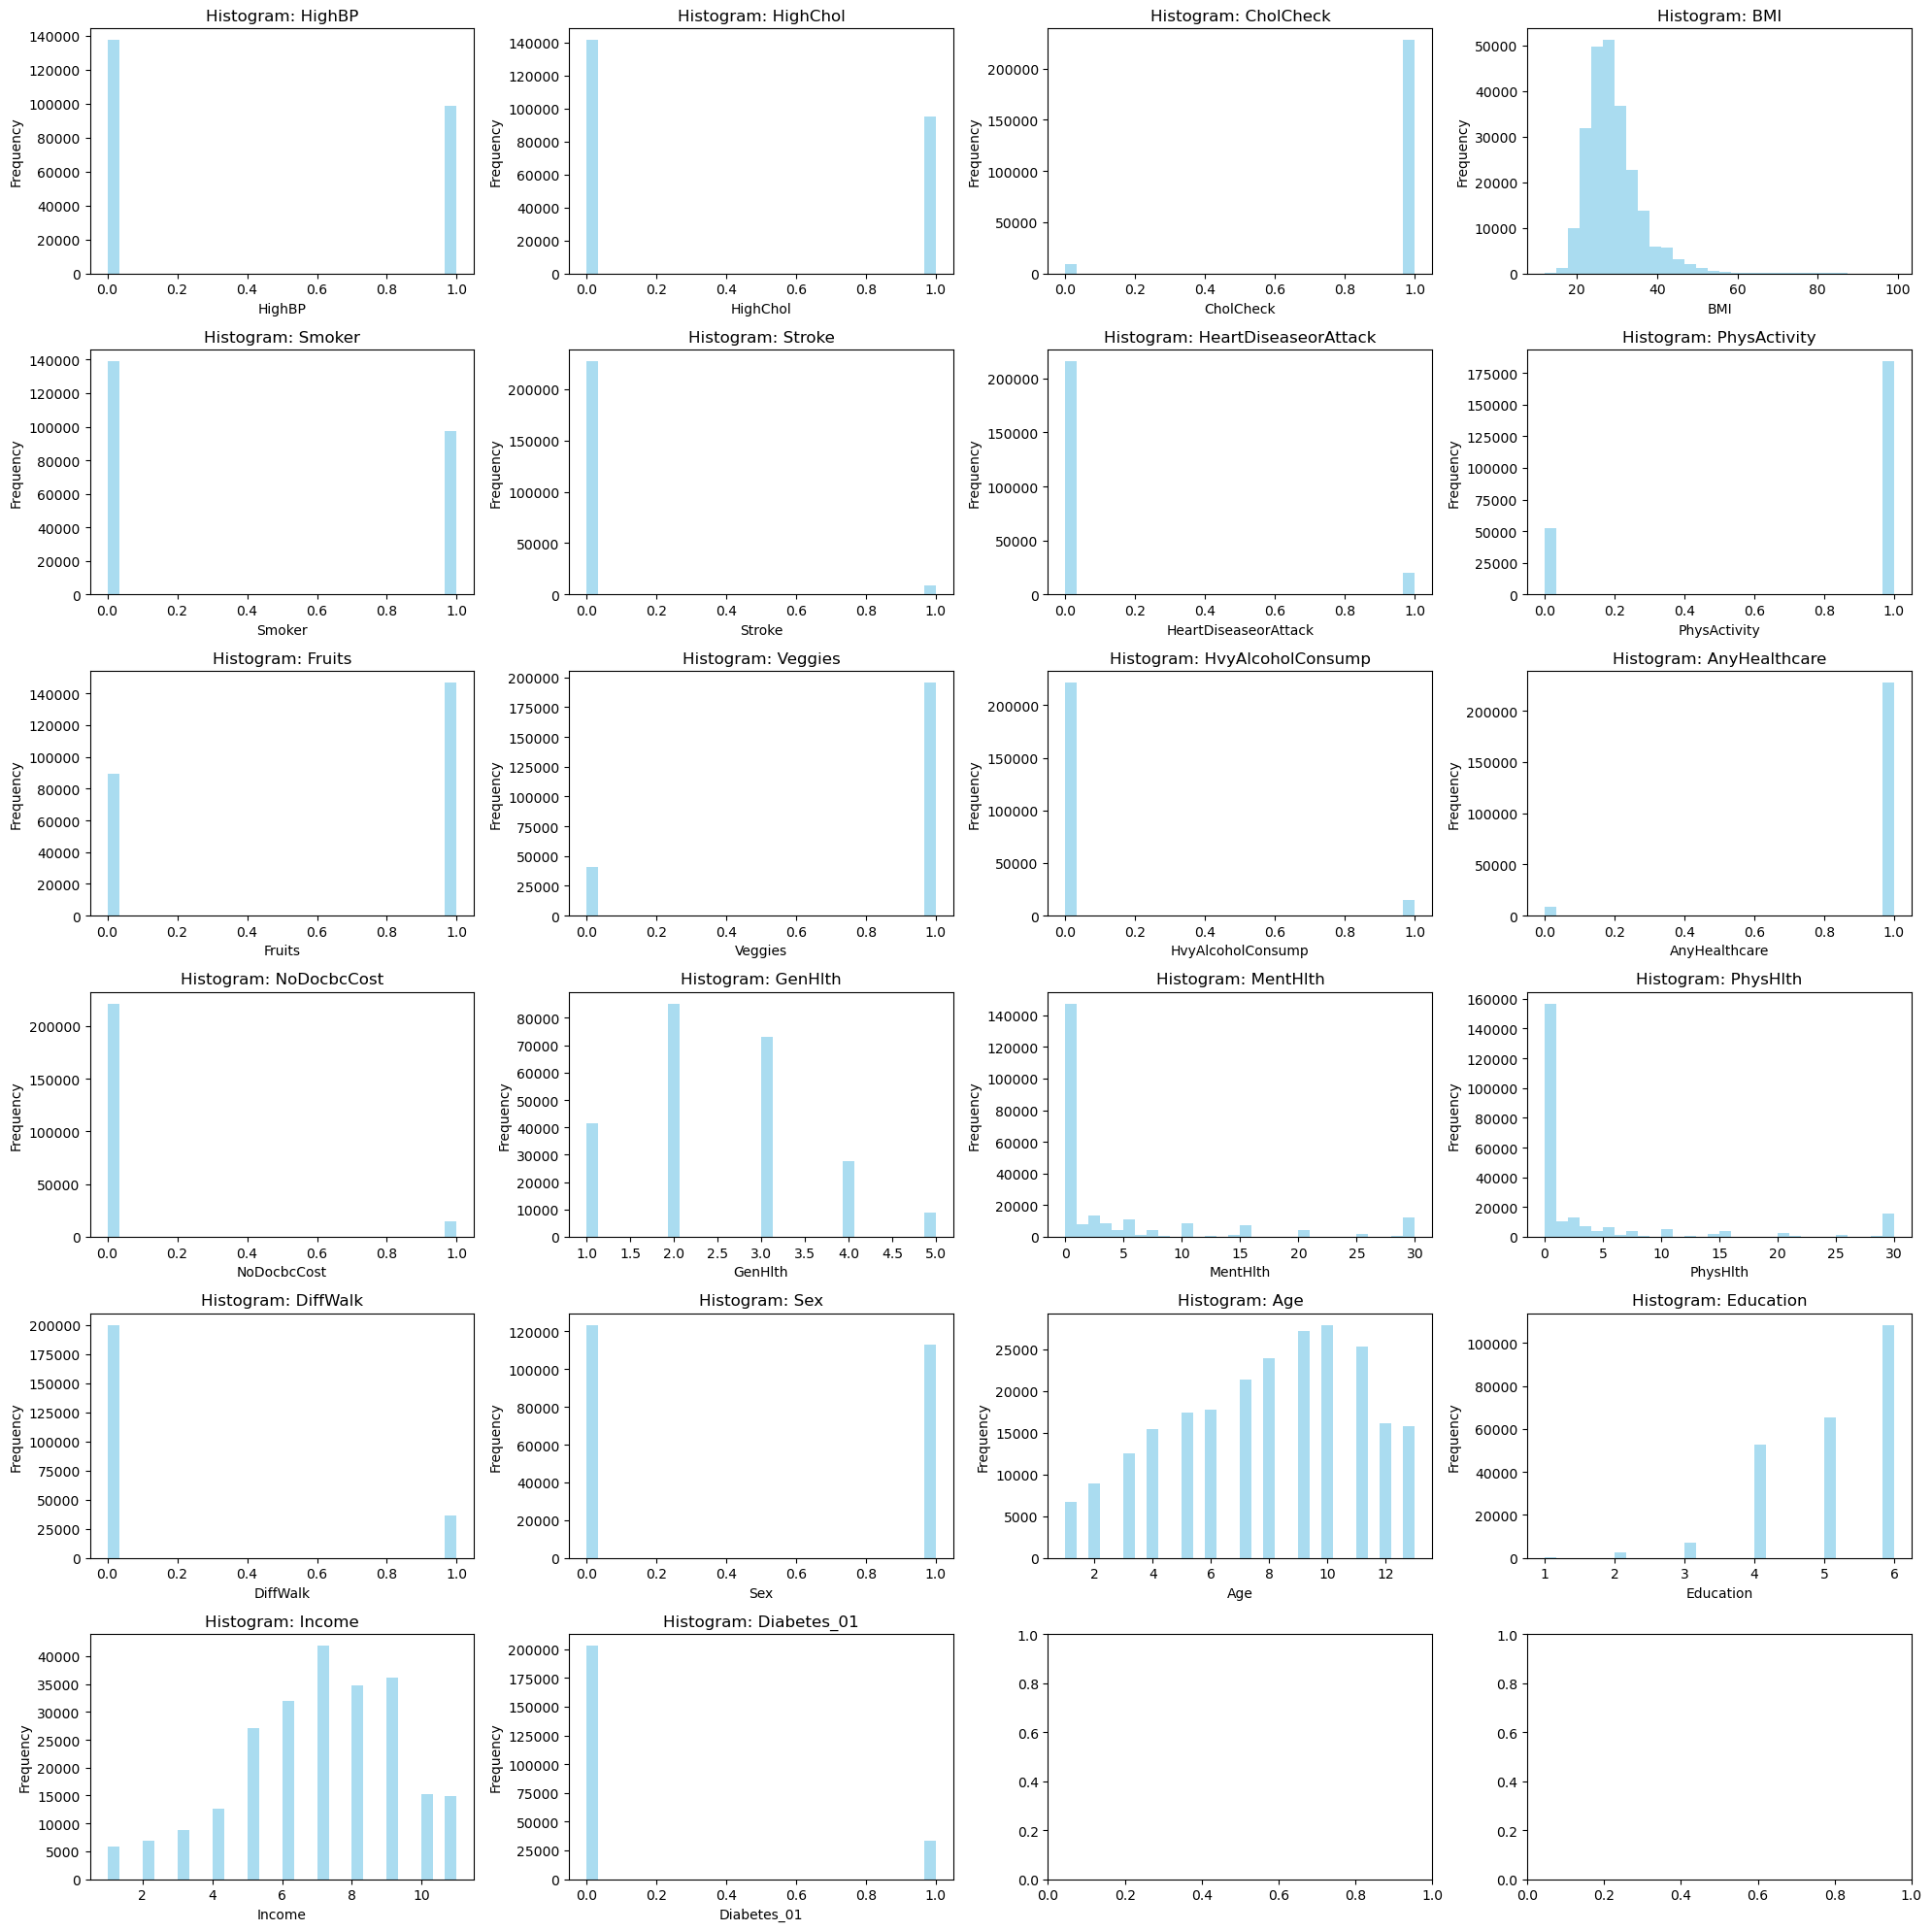

In [27]:
# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(df.columns):
    if i < len(df.columns):  # Ensure only necessary number of subplots are used
        axes[i].hist(df[feature], bins=30, color='skyblue', alpha=0.7)
        axes[i].set_title(f'Histogram: {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_01             0
dtype: int64

In [29]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['Diabetes_01'])
y = df['Diabetes_01']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training 

#### Logistic Regression

In [32]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression: Accuracy = {accuracy_lr:.4f}')


Logistic Regression: Accuracy = 0.8621


#### Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree: Accuracy = {accuracy_dt:.4f}')

Decision Tree: Accuracy = 0.7893


#### Random Forest

In [34]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest: Accuracy = {accuracy_rf:.4f}')

Random Forest: Accuracy = 0.8562


#### K-Nearest Neighbors

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors: Accuracy = {accuracy_knn:.4f}')

K-Nearest Neighbors: Accuracy = 0.8425


#### Naive Bayes

In [36]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred_nb = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes: Accuracy = {accuracy_nb:.4f}')

Naive Bayes: Accuracy = 0.7732


### Model Evaluation 

In [37]:
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': naive_bayes
}

# Define lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Calculate metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

# Display the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.862065   0.545902  0.149350  0.234535
1        Decision Tree  0.789322   0.281145  0.314098  0.296710
2        Random Forest  0.856164   0.475366  0.160114  0.239544
3  K-Nearest Neighbors  0.842521   0.389085  0.198236  0.262652
4          Naive Bayes  0.773183   0.327607  0.573030  0.416880
